## TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS

In [1]:
import pandas as pd
df=pd.read_csv(r"E:\Data Scince csv files\blogs .csv")
df

C:\Users\Gopikrishna\AppData\Local\Temp\ipykernel_12692\3799768553.py:2: DtypeWarning: Columns (7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"E:\Data Scince csv files\blogs .csv")


,Data,Labels,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93817,And make her infamous in story.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93818,When such a tempest shook the land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93819,"How could unguarded virtue stand ?""""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93820,- Jonathan Swift (1732),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.describe()

,Data,Labels,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
count,79441,20518,5535,1411,448,145,59,31,22,20,...,1,1,1,1,1,1,1,1,1,1
unique,64522,17371,4349,1082,328,102,43,23,16,13,...,1,1,1,1,1,1,1,1,1,1
top,>,,,,,comp.org.ieee,,soc.culture.yugoslavia,soc.culture.afganistan,talk.politics.mideast,...,,,,,,,,,,
freq,996,165,112,64,21,10,6,4,4,6,...,1,1,1,1,1,1,1,1,1,1


In [3]:
df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [4]:
df.columns

Index(['Data', 'Labels'], dtype='object')

In [5]:
df.nunique()

Data      2000
Labels      20
dtype: int64

In [6]:
df.shape

(2000, 2)

In [7]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [9]:
pip install pandas scikit-learn nltk

Note: you may need to restart the kernel to use updated packages.


In [22]:
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords
import nltk

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\basav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
data_path = (r"C:\Users\basav\Downloads\blogs.csv")
df = pd.read_csv(data_path)

In [28]:
text_column = 'Data'
label_column = 'Labels'

In [30]:
def preprocess_text(text):
     text = text.translate(str.maketrans('', '', string.punctuation))
     text = text.lower() 
     text = re.sub(r'\d+', '', text)
     text = re.sub(r'\s+', ' ', text).strip()
     stop_words = set(stopwords.words('english'))
     text = ' '.join([word for word in text.split() if word not in stop_words])
     return text


In [34]:
df[text_column] = df[text_column].apply(preprocess_text)

In [36]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df[text_column])

In [40]:
y = df[label_column]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [46]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.84
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.53      0.89      0.67        18
           comp.graphics       0.76      0.89      0.82        18
 comp.os.ms-windows.misc       0.95      0.91      0.93        22
comp.sys.ibm.pc.hardware       0.90      0.76      0.83        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       1.00      0.84      0.91        25
            misc.forsale       1.00      0.72      0.84        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.83      0.83      0.83        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.79      1.00      0.88        19
         sci.electronics       0.74      0.88      0.80        16
                 sci.med       0.88 

In [58]:
!pip install textblob


   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 660.6 kB/s eta 0:00:01
   -------------------- ------------------- 327.7/626.3 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 5.7 MB/s eta 0:00:00


In [60]:
from textblob import TextBlob


In [62]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [68]:
df['Sentiment'] = df[text_column].apply(analyze_sentiment)

In [70]:
sentiment_distribution = df.groupby(['Sentiment', label_column]).size().unstack(fill_value=0)
print("\nSentiment Distribution by Category:\n", sentiment_distribution)



Sentiment Distribution by Category:
 Labels     alt.atheism  comp.graphics  comp.os.ms-windows.misc  \
Sentiment                                                        
Negative            35             27                       23   
Neutral              0              0                        0   
Positive            65             73                       77   

Labels     comp.sys.ibm.pc.hardware  comp.sys.mac.hardware  comp.windows.x  \
Sentiment                                                                    
Negative                         19                     26              20   
Neutral                           0                      0               2   
Positive                         81                     74              78   

Labels     misc.forsale  rec.autos  rec.motorcycles  rec.sport.baseball  \
Sentiment                                                                 
Negative             21         24               28                  35   
Neutral        

In [76]:
print("\nSentiment Analysis Reflection:")
print("The sentiment analysis shows the distribution of positive, negative, and neutral sentiments across blog categories. This provides insights into the tone and mood of the blog posts. For instance, a higher proportion of negative sentiments in certain categories might highlight critical or controversial topics.")


Sentiment Analysis Reflection:
The sentiment analysis shows the distribution of positive, negative, and neutral sentiments across blog categories. This provides insights into the tone and mood of the blog posts. For instance, a higher proportion of negative sentiments in certain categories might highlight critical or controversial topics.


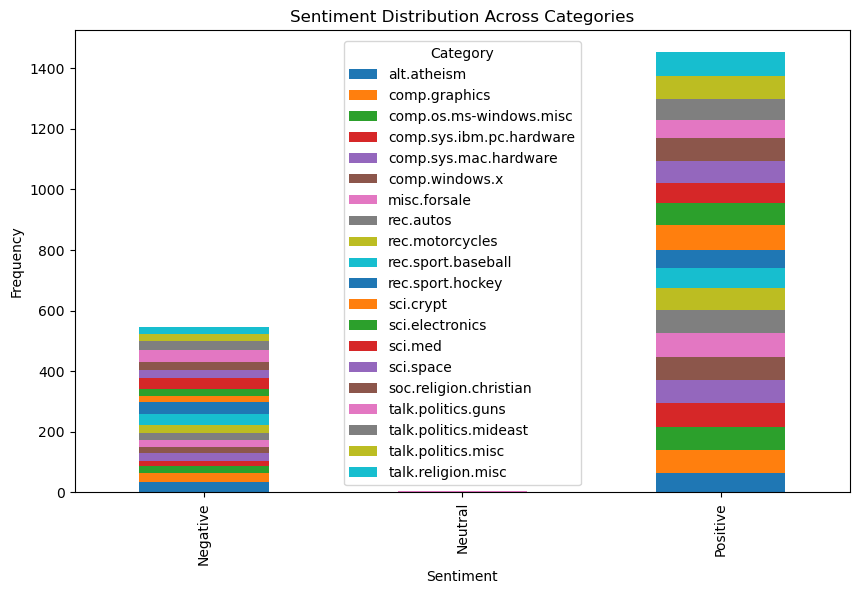

In [72]:
import matplotlib.pyplot as plt
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.legend(title='Category')
plt.show()
